In [8]:
import pandas as pd
import seaborn as sns

In [3]:
movies = pd.read_csv('./imdb_top_1000.csv', thousands=',')

In [4]:
movies['Runtime'] = [i.split()[0] for i in movies['Runtime']]
movies['Runtime'] = movies['Runtime'].astype(int)
movies = movies[movies.Released_Year.str.isnumeric()]
movies['Released_Year'] = movies['Released_Year'].astype(int)

In [5]:
# Splitst de genre's op in nieuwe rijen
# Gebruik enkel voor tellen van genre's
moviesExplodeGenre = movies.assign(Genre = movies.Genre.str.split(", ")).explode('Genre')

In [6]:
# Splitst de genre's op in nieuwe kolommen
# Gebruik wanneer exploden rommelt met gegevens
movies[['Genre1', 'Genre2', 'Genre3']] = movies['Genre'].str.split(', ', 2, expand=True)

In [7]:
moviesExplodeGenre.groupby('Genre').mean()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Genre,,,,,,
Action,1997.719577,126.724868,7.948677,73.769231,404172.412698,1.412393e+08
Adventure,1995.056410,125.425641,7.953846,78.011173,425751.702564,1.656833e+08
Animation,2002.219512,99.585366,7.930488,81.093333,268032.073171,1.279675e+08
Biography,1998.577982,135.669725,7.935780,76.319588,251898.550459,5.525602e+07
Comedy,1991.034335,111.639485,7.903433,77.957447,225465.965665,6.412530e+07
Crime,1991.913876,123.440191,7.954545,75.414201,281322.124402,4.068014e+07
Drama,1992.181189,126.683264,7.959889,78.041736,240690.302905,4.584528e+07
Family,1988.625000,114.142857,7.912500,77.880000,223472.107143,9.293266e+07
Fantasy,1991.287879,114.772727,7.931818,76.344828,347097.060606,1.086168e+08


Uit deze data is te zien dat Film-Noir genre films minder opbrengst hebben en een lager gemiddelde release year hebben, maar wel goede ratings hebben. Ook is het te zien dat Animation films recent relatief meer uitkomen, maar een minder lange runtime hebben.

<AxesSubplot:xlabel='Gross', ylabel='Genre'>

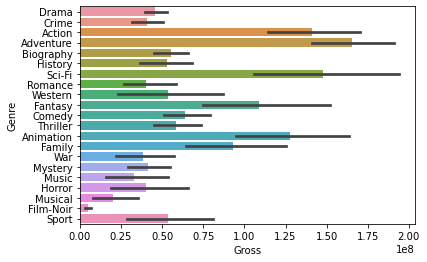

In [11]:
sns.barplot(data=moviesExplodeGenre, y='Genre', x='Gross')

Hieruit is te zien dat Action, Adventure, Sci-Fi, Fantasy en Animation films de 5 meest winstmakende genre's zijn. Een mogelijk link hier tussen is dat deze genre's misschien meer door grote studios gemaakt worden en dus meer bekeken worden en meer opbrengst hebben. Film-Noir is overduidelijk het minst verdienende genre en dat wordt verklaard door het feit dat deze films alleen bij de start van de filmindustrie gemaakt werden en dus nog een kleiner publiek hadden. Ook moet (indien dat nog niet is omgerekend) rekening gehouden worden met inflatie.

[(1920.0, 2010.0)]

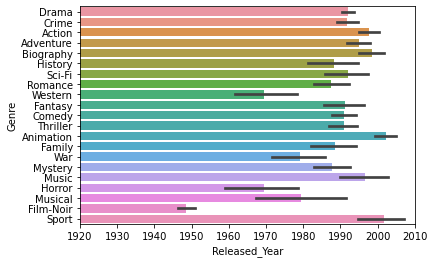

In [16]:
plot = sns.barplot(data=moviesExplodeGenre, y='Genre', x='Released_Year')
plot.set(xlim=(1920, 2010))

In deze grafiek is de evolutie van de filmindustrie goed afgebeeld. Aan het begin waren enkel de film-noir films, omdat er toen nog niet de technologie was voor films in kleur. De western en horror genre's zijn daarna gemiddeld het oudst, omdat deze genre's toen heel erg in de smaak vielen. De twee jongste genre's zijn Animatie en Sport. Animatie wordt verklaard door dat de technologie voor deze films relatief nieuw is. Waarom Sport gemiddeld een nieuw genre is is niet meteen duidelijk, maar het is wel zichtbaar dat de standard deviation groter is dan bij Animation. De oudste sport films zijn dus ouder dan de oudste animatie films, maar om op een vergelijkbare gemiddelde release year uit te komen moeten er dus de laatste tijd relatief veel sport films uitgekomen zijn.

[(60.0, 100.0)]

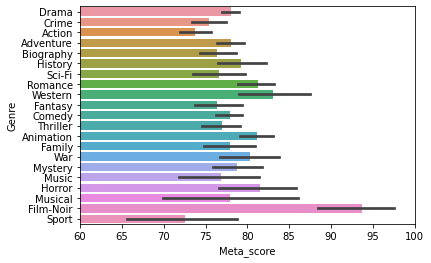

In [18]:
plot = sns.barplot(data=moviesExplodeGenre, y='Genre', x='Meta_score')
plot.set(xlim=(60,100))

Het is in deze grafiek meteen duidelijk dat Film-Noir fims het best gewaardeerde genre zijn. Dit kan komen doordat mensen veel nostalgie hebben voor deze films, omdat voor een groot deel van de populatie dit de eerste films waren die ze hebben gezien.
Daarentegen heeft het genre Sport gemiddeld de laagste waardering, maar wel een grote standard deviation. Hieruit blijkt dat er dus veel slechte, maar ook veel goede sport films zijn. De standard deviation kan ook verklaard worden door de conclusie van de vorige grafiek, want als er de laatste tijd veel goede sport films uitgekomen zijn gaan veel mensen sport films maken om snel wat geld te verdienen. Deze meelopers maken dan slechtere films met slechte waarderingen, waardoor de deviation hoog is.